Fonte:
https://github.com/ivanovitchm/deeplearning/blob/main/weeks_02_03/Notebooks/Week%2002%20Task%2001%20-%20TensorFlow%202.x%20%2B%20Keras%20Crash%20Course.ipynb 


In [59]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [60]:
x = tf.constant([[5,2],[1,3]])
print(x)

tf.Tensor(
[[5 2]
 [1 3]], shape=(2, 2), dtype=int32)


In [61]:
x.numpy()

array([[5, 2],
       [1, 3]])

In [62]:
print('dtype: ', x.dtype)
print('shape: ', x.shape)

dtype:  <dtype: 'int32'>
shape:  (2, 2)


In [63]:
print(tf.ones(shape=(2,3)))
print(tf.zeros(shape=(3,2)))

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]], shape=(3, 2), dtype=float32)


In [64]:
tf.random.normal(shape=(2,2), mean=0, stddev=1.)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.30130488, -3.1954434 ],
       [-0.13354313,  0.5628884 ]], dtype=float32)>

In [65]:
tf.random.uniform(shape=(2,2), minval=0, maxval=10,dtype='int32')

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[4, 3],
       [3, 4]])>

In [66]:
initVal= tf.random.normal(shape=(2,2))
a = tf.Variable(initVal)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.12579991, -2.054488  ],
       [ 0.7797967 ,  3.3890524 ]], dtype=float32)>


In [67]:
newVal = tf.random.normal(shape=(2,2))
print(a)
a.assign(newVal)
print(a)
for i in range(2):
    for j in range(2):
        assert a[i,j] == newVal[i,j]

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.12579991, -2.054488  ],
       [ 0.7797967 ,  3.3890524 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.24605812,  0.6054547 ],
       [ 0.3630143 , -0.29915336]], dtype=float32)>


In [68]:
addVal = tf.random.normal(shape=(2,2))
print(addVal)
a.assign_add(addVal)
for i in range(2):
    for j in range(2):
        assert a[i,j] == newVal[i,j] + addVal[i,j]
print(a)

tf.Tensor(
[[2.0255191  0.8167747 ]
 [0.02306369 2.1683733 ]], shape=(2, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1.779461 , 1.4222294],
       [0.386078 , 1.86922  ]], dtype=float32)>


In [69]:
a = tf.random.normal(shape=(2,2))
b = tf.random.normal(shape=(2,2))

c = a+b
d=tf.square(c)
e=tf.square(d)

In [70]:
print(a)
print(b)
print(c)
print(d)
print(e)

tf.Tensor(
[[ 0.8510381  -0.81072843]
 [ 1.0021199  -0.68236756]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 0.9197694  0.6336339]
 [ 1.4806719 -0.8717126]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 1.7708075  -0.17709452]
 [ 2.482792   -1.5540802 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[3.135759   0.03136247]
 [6.1642556  2.4151654 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[9.8329849e+00 9.8360458e-04]
 [3.7998047e+01 5.8330240e+00]], shape=(2, 2), dtype=float32)


In [71]:
e.numpy()

array([[9.8329849e+00, 9.8360458e-04],
       [3.7998047e+01, 5.8330240e+00]], dtype=float32)

In [72]:
a = tf.random.normal(shape=(2,2))
b = tf.random.normal(shape=(2,2))


with tf.GradientTape() as tape:
    tape.watch(a) # Start recording the history of operations applied to 'a'
    c = tf.sqrt(tf.square(a) + tf.square(b)) # Do some math using 'a'
    # What's the gradient of 'c' with respect to 'a'
    dc_da = tape.gradient(c,a)
    print(dc_da)

tf.Tensor(
[[-0.2018034   0.16678892]
 [ 0.30972996  0.68789905]], shape=(2, 2), dtype=float32)


In [73]:
a = tf.Variable(a)

with tf.GradientTape() as tape:
    c = tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c,a)
    print(dc_da)

tf.Tensor(
[[-0.2018034   0.16678892]
 [ 0.30972996  0.68789905]], shape=(2, 2), dtype=float32)


In [74]:
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as tape:
        c = tf.sqrt(tf.square(a) + tf.square(b))
        dc_da = tape.gradient(c,a)
    d2c_da = outer_tape.gradient(dc_da,a)
    print(d2c_da)

tf.Tensor(
[[0.7434501  0.356167  ]
 [1.0657853  0.36182615]], shape=(2, 2), dtype=float32)


In [75]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim,output_dim)))
# This is our bias vecot
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
    return tf.matmul(features, w) + b

def compute_loss(labels,predictions):
    return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x,y):
    with tf.GradientTape() as tape:
        predictions = compute_predictions(x)
        loss = compute_loss(y, predictions)
        # Note that 'tape.gradient' works with a lis as well
        dloss_dw, dloss_db = tape.gradient(loss, [w,b])
    w.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    return loss
    

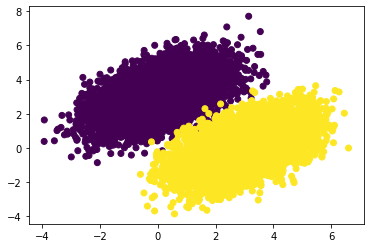

In [76]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare a dataset
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0,3], cov=[[1, 0.5], [0.5, 1]], size = num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3,0], cov=[[1, 0.5], [0.5, 1]], size = num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                   np.ones((num_samples,1), dtype='float32')))
plt.scatter(features[:,0], features[:,1], c=labels[:,0])

In [77]:
# Shuffle the data
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
    for step, (x,y) in enumerate(dataset):
        loss = train_on_batch(x,y)
    print('Epoch%d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch0: last batch loss = 0.0676
Epoch1: last batch loss = 0.0338
Epoch2: last batch loss = 0.0354
Epoch3: last batch loss = 0.0258
Epoch4: last batch loss = 0.0236
Epoch5: last batch loss = 0.0285
Epoch6: last batch loss = 0.0202
Epoch7: last batch loss = 0.0174
Epoch8: last batch loss = 0.0161
Epoch9: last batch loss = 0.0278


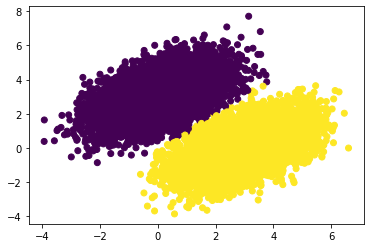

In [78]:
predictions = compute_predictions(features)
plt.scatter(features[:,0], features[:,1], c=predictions[:,0] > 0.5)

In [79]:
import time

t0 = time.time()
for epoch in range(20):
    for step, (x,y) in enumerate(dataset):
        loss = train_on_batch(x,y)
t_end = time.time() - t0
print('time per epoch: %.3f s' % (t_end /20,))

time per epoch: 0.109 s


In [80]:
@tf.function

def train_on_batch(x,y):
    with tf.GradientTape() as tape:
        predictions = compute_predictions(x)
        loss = compute_loss(y, predictions)
        dloss_dw, dloss_db = tape.gradient(loss,[w,b])
    w.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    return loss

In [81]:
t0 = time.time()
for epoch in range(20):
    for step, (x,y) in enumerate(dataset):
        loss = train_on_batch(x,y)
t_end = time.time() - t0
print('time per epoch: %.3f s' % (t_end /20,))

time per epoch: 0.553 s


In [82]:
from tensorflow.keras.layers import Layer

class Linear(Layer):
    """y = x.w + b"""
    
    def __init__(self, units=32, input_dim=32):
        super(Linear, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(initial_value=w_init(shape=(input_dim, units), dtype='float32'), trainable=True)
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(initial_value=b_init(shape=(units,), dtype='float32'), trainable=True)
        
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b
    
# Instantiate our layer.
linear_layer = Linear(4, 2)

In [83]:
# (instances, features)
# tf.ones (2,2) represents, in this example, 2 instances and 2 features

y = linear_layer(tf.ones((2,2)))
assert y.shape ==(2,4)

In [84]:
# Weights are automatically tracked under the 'weights' property
assert linear_layer.weights == [linear_layer.w, linear_layer.b]

In [85]:
linear_layer.weights

[<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.04349434, -0.01126177, -0.02920583,  0.03988001],
        [ 0.00917815,  0.01695427,  0.02949165,  0.09627187]],
       dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

In [86]:
# Há um atalho para a criação de pesos, usar 'add_weights' ao invés de usar:
#     w_init = tf.random_normal_initializer()
#     self.w = tf.Variable(initial_value=w_init(shape=(input_dim, units), dtype='float32'), trainable=True)
#     usa-se geralmente:     self.w = self.add_weight(shape = shape, initializer='random_normal')


class Linear(Layer):
    """y = x.w + b"""
    
    def __init__(self, units=32):
        super(Linear, self).__init__()
        self.units = units
        
    def build(self, input_shape):        
        self.w = self.add_weight(shape = (input_shape[-1], self.units),
                                initializer='random_normal',
                                trainable = True)
        self.b = self.add_weight(shape = (self.units,),
                                initializer='random_normal',
                                trainable = True)
        
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b
    
    
# Instantiate our Lazy layer.
linear_layer = Linear(4)

# This will also call'build(input_shape)' and create the weights
# two instances with three features each one
y = linear_layer(tf.ones((2,3)))
assert len(linear_layer.weights) == 2

In [87]:
linear_layer.weights

[<tf.Variable 'linear_14/Variable:0' shape=(3, 4) dtype=float32, numpy=
 array([[-0.01868743, -0.00463909,  0.07202793, -0.0253191 ],
        [ 0.0311839 ,  0.00705076, -0.03114969, -0.1196269 ],
        [-0.1173583 , -0.06720179,  0.02000614,  0.06568333]],
       dtype=float32)>,
 <tf.Variable 'linear_14/Variable:0' shape=(4,) dtype=float32, numpy=array([ 0.07198826,  0.02724493, -0.08212031,  0.01220769], dtype=float32)>]

In [88]:
from tensorflow.keras.layers import Layer

class ComputeSum(Layer):
    """Returns the sum of the inputs"""
    
    def __init__(self, input_dim):
        super(ComputeSum, self).__init__()
        self.total = tf.Variable(initial_value=tf.zeros((input_dim)), trainable = False)
        
    def call(self, inputs):
        self.total.assign_add(tf.reduce_sum(inputs,axis=0))
        return self.total
    
my_sum = ComputeSum(2)
x = tf.ones((2,2))
print(x)

y = my_sum(x)
print(y.numpy())    #[2. 2.]

print()

y = my_sum(x)
print(y.numpy())    #[4. 4.]

assert my_sum.weights == [my_sum.total]
assert my_sum.non_trainable_weights == [my_sum.total]
assert my_sum.trainable_weights == []


tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
[2. 2.]

[4. 4.]


In [89]:
# reutlizando a classe Linear

class MLP(Layer):
    """Simple stack of Linear Layers."""
    
    def __init__(self):
        super(MLP,self).__init__()
        self.linear_1 = Linear(32)
        self.linear_2 = Linear(32)
        self.linear_3 = Linear(10)
        
    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.linear_2(inputs)
        x = tf.nn.relu(x)
        return self.linear_3(x)
    
mlp = MLP()

# The first call to the 'mlp' object will create the weights.
# 3 instances using 64 features
y = mlp(tf.ones(shape=(3,64)))

# Weights are recursively tracked
assert len(mlp.weights) == 6

In [90]:
mlp.weights

[<tf.Variable 'mlp_1/linear_15/Variable:0' shape=(64, 32) dtype=float32, numpy=
 array([[-0.03967948,  0.02857522, -0.05487802, ..., -0.00479744,
          0.02469379,  0.02809968],
        [ 0.02198823,  0.01952126,  0.07940852, ..., -0.04506468,
         -0.0109174 , -0.05688796],
        [-0.00991595,  0.1331275 ,  0.02934641, ...,  0.03512861,
         -0.00173837,  0.0869513 ],
        ...,
        [ 0.04461261,  0.05761101,  0.00821496, ..., -0.00525071,
         -0.04816849, -0.00368061],
        [ 0.05510616,  0.06633151, -0.1150135 , ...,  0.00852573,
         -0.03134447,  0.00418896],
        [ 0.07425794,  0.0097155 ,  0.03569169, ...,  0.01240215,
         -0.02268747,  0.06965768]], dtype=float32)>,
 <tf.Variable 'mlp_1/linear_15/Variable:0' shape=(32,) dtype=float32, numpy=
 array([-0.00196801, -0.08605801, -0.04940753, -0.00626944,  0.01962034,
         0.01739826, -0.08334901, -0.0281715 ,  0.01490733,  0.01016428,
        -0.07919881,  0.03758993, -0.04450568,  0.0072

In [91]:
from tensorflow.keras.layers import Layer

class Dropout(Layer):
    
    def __init__(self, rate):
        super(Dropout, self).__init__()
        self.rate = rate
        
    def call(self, inputs, training=None):
        if training:
            return tf.nn.dropout(inputs, rate = self.rate)
        return inputs
    
class MLPWithDropout(Layer):
    
    def __init__(self):
        super(MLPWithDropout, self).__init__()
        self.linear_1 = Linear(32)
        self.dropout = Dropout(0.5)
        self.linear_3 = Linear(10)
    
    def call(self, inputs, training=None):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.dropout(x, training = training)
        return self.linear_3(x)
    
mlp = MLPWithDropout()
y_train = mlp(tf.ones((2,2)), training = True)
y_test = mlp(tf.ones((2,2)), training = False)

In [92]:
# We use an 'Input' object to describe the shape and dtype of the inputs. 
# This is the deep learning equivalent of *declaring a type*.
# The shape argument is per-sample; it does not include the batch size.
# the functional API focuses on defining per-sample transformations.
# The model we create will automatically batch the per-sample transformation
# so that it can be called on batches of data.
inputs = tf.keras.Input(shape=(16,))

# We call Layers on these "type" objects
# and they return updated types (new shapes/dtypes).
x = Linear(32)(inputs) # We are reusing the Linear layer we defined earlier
x = Dropout(0.5)(x) # We are reusing the Dropout layer we defined earlier
outputs = Linear(10)(x)

# A functional 'model' can be defined by specifying inputs and outputs
# and they return updated types (new shapes/dtypes)
model = tf.keras.Model(inputs, outputs)

# A functional model already has weights, before being called on any data.
# That's because we defined its input shape in advance (in 'Input').
assert len(model.weights) == 4

# Let's call our model on some data.
y = model(tf.ones((2,16)))
assert y.shape == (2,10)

In [93]:
from tensorflow.keras import Sequential

model = Sequential([Linear(32), Dropout(0.5), Linear(10)])

y = model(tf.ones((2,6)))
assert y.shape == (2,10)

In [94]:
# Uma das classes de erro do próprio Keras (BCE, CategoricalCrossentropy, KLDivergence, etc)

bce = tf.keras.losses.BinaryCrossentropy()
y_true = [0., 0., 1., 1.] # Alvo
y_pred = [1., 1., 1., 0.] # Previsto
loss = bce(y_true, y_pred)
print('Loss:', loss.numpy())

Loss: 11.522856


In [95]:
# Built-in metric classes, como: BinaryAccuracy, AUC, FalsePositives, etc.
# Unlike losses, metrics are stateful. 
# You update their state using the update_state method, and you query the scalar metric result using result.

m = tf.keras.metrics.AUC()

m.update_state([0, 1, 1, 1,], [0, 1, 0, 0])
print('Intermediate result:', m.result().numpy())

m.update_state([1, 1, 1, 1,], [0, 1, 1, 0])
print('Final result:', m.result().numpy())


Intermediate result: 0.6666667
Final result: 0.71428573


In [96]:
# You can easily roll out your own metrics by subclassing the Metric class.
# Here's a quick implementation of a BinaryTruePositives metric as a demonstratio.

class BinaryTruePositives(tf.keras.metrics.Metric):
    
    def __init__(self, name='binary_true_positives', **kwargs):
        super(BinaryTruePositives, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.bool)
        y_pred = tf.cast(y_pred, tf.bool)
        
        values = tf.logical_and(tf.equal(y_true, True), tf.equal(y_pred, True))
        values = tf.cast(values, self.dtype)
        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, self.dtype)
            values = tf. multiply(values, sample_weight)
        self.true_positives.assign_add(tf.reduce_sum(values))
        
    def result(self):
        return self.true_positives
        
    def reset_states(self):
        self.true_positive.assign(0)
        
m = BinaryTruePositives()
m.update_state([0, 1, 1, 1], [0, 1, 0, 0])
print('Intermediate result:', m.result().numpy())
                
m.update_state([1, 1, 1, 1], [0, 1, 1, 0])

print('Final result:', m.result().numpy())

Intermediate result: 1.0
Final result: 3.0


In [97]:
# This is a MNIST example that brings together loss classes, metric classes, and optimizers

from tensorflow.keras import layers

# Prepare a dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:].reshape(60000, 784).astype('float32')/255
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

# Instantiate a simple classification model
model = tf.keras.Sequential([
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(10)
])

# Instatiate a logistic loss function that expects iteger targets
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instatiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instatiate an optimizer
optimizer = tf.keras.optimizers.Adam()

# Iterate over the batches of the dataset
for step, (x,y) in enumerate(dataset):
    # Open a GradientTape.
    with tf.GradientTape() as tape:
        
        # Forward pass.
        logits = model(x)
        
        # loss value for this batch.
        loss_value = loss(y, logits)
        
    # Get gradients of loss wrt the waits
    gradients = tape.gradient(loss_value, model.trainable_weights)
    
    # Update the weights of our linear layer
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    # Update the runnin accuracy.
    accuracy.update_state(y, logits)
    
    # Logging
    if step % 100 ==0:
        print('Step:', step)
        print('Loss from last step: %.3f' % loss_value)
        print('Total running accuracy so far: %.3f' % accuracy.result())

Step: 0
Loss from last step: 2.363
Total running accuracy so far: 0.031
Step: 100
Loss from last step: 0.572
Total running accuracy so far: 0.834
Step: 200
Loss from last step: 0.445
Total running accuracy so far: 0.876
Step: 300
Loss from last step: 0.148
Total running accuracy so far: 0.895
Step: 400
Loss from last step: 0.170
Total running accuracy so far: 0.907
Step: 500
Loss from last step: 0.068
Total running accuracy so far: 0.916
Step: 600
Loss from last step: 0.114
Total running accuracy so far: 0.923
Step: 700
Loss from last step: 0.043
Total running accuracy so far: 0.928
Step: 800
Loss from last step: 0.182
Total running accuracy so far: 0.931
Step: 900
Loss from last step: 0.160
Total running accuracy so far: 0.934


In [98]:
x_test = x_test[:].reshape(10000, 784).astype('float32')/ 255
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(128)

accuracy.reset_states() # This clears the internal state of the metric

for step, (x, y) in enumerate(test_dataset):
    logits = model(x)
    accuracy.update_state(y, logits)
    
print('Final test accuracy: %.3f' % accuracy.result())

Final test accuracy: 0.962


In [106]:
# Keras provides you with a built-in training loop on the Model class

# Prepare a dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

# instantiate a simple classification model
model = tf.keras.Sequential([
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accurcy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optmizer.
optimizer = tf.keras.optimizers.Adam()

In [107]:
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

In [108]:
model.fit(dataset, epochs=3)

Epoch 1/3
938/938 [==============================] - 2s 3ms/step - loss: 0.2196 - sparse_categorical_accuracy: 0.9352A: 1s - loss: 0.3313 - sparse_categorical_accuracy: 0 - ETA: 1s - loss: 0.2928 - sparse_categorical_accuracy: 0 - ETA: 0s - loss: 0.2675 - sparse_categorical_accuracy: 0.9 - ETA: 0s - loss: 0.2562 - sparse_categorical_acc
Epoch 2/3
938/938 [==============================] - 2s 2ms/step - loss: 0.0859 - sparse_categorical_accuracy: 0.9733
Epoch 3/3
938/938 [==============================] - 2s 2ms/step - loss: 0.0578 - sparse_categorical_accuracy: 0.9811


In [109]:
x_test = x_test[:].reshape(10000, 784).astype('float32') / 255
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(128)

loss, acc = model.evaluate(test_dataset)
print('loss: %.3f - acc: %.3f' % (loss,acc))

79/79 [==============================] - 0s 4ms/step - loss: 0.0831 - sparse_categorical_accuracy: 0.9746
loss: 0.083 - acc: 0.975


In [110]:
# You can call fit directly on Numpy arrays, so no need for the dataset conversion


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255

num_val_samples = 10000
x_val = x_train[-num_val_samples:]
y_val = y_train[-num_val_samples:]
x_train = x_train[:-num_val_samples]
y_train = y_train[:-num_val_samples]

# Instantiate a simple classification model
model = tf.keras.Sequential([
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(10)    
])

# Instantiate a logistic loss function that expects integer targets
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accurcy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optmizer.
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss, 
              metrics=[accuracy])

model.fit(x_train, y_train,
         validation_data=(x_val, y_val),
         epochs=3,
         batch_size=64)

Epoch 1/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2429 - sparse_categorical_accuracy: 0.9281 - val_loss: 0.1164 - val_sparse_categorical_accuracy: 0.9663
Epoch 2/3
782/782 [==============================] - 2s 2ms/step - loss: 0.0939 - sparse_categorical_accuracy: 0.9703 - val_loss: 0.0968 - val_sparse_categorical_accuracy: 0.9687
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.0622 - sparse_categorical_accuracy: 0.9800 - val_loss: 0.0961 - val_sparse_categorical_accuracy: 0.9719


In [113]:
# One of the features of fit is that you can easily customize what happens during training and evaluation by using callbacks.
# A callback is an object that is called during training and takes actions, such as saving a model,
# mutating variables on the model, loading a checkpoint, stopping training, etc.



# Instantiate a simple classification model
model = tf.keras.Sequential([
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(10)    
])

# Instantiate a logistic loss function that expects integer targets
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accurcy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optmizer.
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss, 
              metrics=[accuracy])

# Instantiate some callbacks
callbacks = [tf.keras.callbacks.EarlyStopping(),
            tf.keras.callbacks.ModelCheckpoint(filepath='my_model.keras',
                                              save_best_only=True)]



model.fit(x_train, y_train,
         validation_data=(x_val, y_val),
         epochs=30,
         batch_size=64,
         callbacks=callbacks)

Epoch 1/30
782/782 [==============================] - 2s 2ms/step - loss: 0.2444 - sparse_categorical_accuracy: 0.9270 - val_loss: 0.1165 - val_sparse_categorical_accuracy: 0.9659
Epoch 2/30
782/782 [==============================] - 2s 2ms/step - loss: 0.0940 - sparse_categorical_accuracy: 0.9710 - val_loss: 0.0870 - val_sparse_categorical_accuracy: 0.9734
Epoch 3/30
782/782 [==============================] - 3s 4ms/step - loss: 0.0629 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.0853 - val_sparse_categorical_accuracy: 0.9741
Epoch 4/30
782/782 [==============================] - 3s 4ms/step - loss: 0.0449 - sparse_categorical_accuracy: 0.9853 - val_loss: 0.0840 - val_sparse_categorical_accuracy: 0.9746
Epoch 5/30
782/782 [==============================] - 3s 4ms/step - loss: 0.0353 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.0837 - val_sparse_categorical_accuracy: 0.9767
Epoch 6/30
782/782 [==============================] - 4s 5ms/step - loss: 0.0252 - sparse_categorica